# 1. Descrição do problema

você já teve algum voo atrasado ou perdeu alguma conexão devido a atraso? Esses atrasos costumam ocorrer por diversas razões, como condições climáticas, a necessidade de um avião se deslocar de um local para outro, ou imprevistos no momento do embarque dos passageiros que dificultam o embarque na hora prevista.

Os atrasos podem gerar custos tanto para as empresas quanto para os passageiros.

Diante desses cenários, Nosso objetivo é realizar a otimização aeroportuária afim de definir onde cada avião irá estacionar e, assim, construir planos de estacionamento mais adequados, rápidos e otimizados.

Para isso, criarei um modelo preditivo capaz de prever os atrasos nos voos e, assim, ajustar o plano de estacionamento com agilidade. Com essa solução, esperamos reduzir o tempo de espera dos passageiros e otimizar as operações do aeroporto.

Nossa primeira missão, portanto, consiste em desenvolver um modelo de machine learning, mais especificamente, um modelo de regressão. Este modelo será capaz de prever os atrasos nos voos com base em suas características. Essas previsões serão importantes, porque os outros processos de otimização utilizarão essa informação como entrada.

# 2. EDA

In [65]:
import pandas as pd

In [66]:
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [67]:
dados.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

## 2.1 Descrição das variáveis

- Após extrair os dados desse dataframe, já percebemos que conseguimos tirar algumas informações. Temos uma coluna chamada **flight_id** (identificador do voo); a **airline** (companhia aérea); o tipo da aeronave, que é **aircraft_type**; **schengen**, que indica se o voo é do espaço Schengen ou não.

### ***O termo "Schengen" está relacionado com o Acordo de Schengen, um acordo europeu que tem implicações em termos de logística aeroportuária, mas não está diretamente relacionado com as operações aeroportuárias em si.***

- O aeroporto de origem (**origin**) está em siglas. Por exemplo: o aeroporto de Congonhas recebe a sigla CGH. Temos o **arrival_time** (hora de chegada), **departure_time** (hora de saída), o dia (**day**), e o ano que é correspondente a esse dia (**year**). Por exemplo: temos o dia 0 em 2010, então é 1º de janeiro de 2010.

- Por fim, temos a coluna **is_holiday**, se é um feriado ou não, e a coluna **delay**, o atraso em minutos.

- Importante notar que a hora em **arrival_time** está em formato decimal. Por exemplo: como seria 8.88 em horas? Poderíamos fazer um cálculo simples. Seria 0.88 multiplicado por 60 para saber a quantidade em minutos. Teríamos, basicamente, 8 horas e 52 minutos.

- O mesmo processo se repete para **departure_time**. Multiplicamos os números após a vírgula por 60 para saber a quantidade de minutos. Teremos, assim, o tempo tanto em horas quanto em minutos.

In [68]:
dados.shape

(71175, 11)

In [69]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [70]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [71]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


## 2.2 Visualizações gráficas dos dados

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

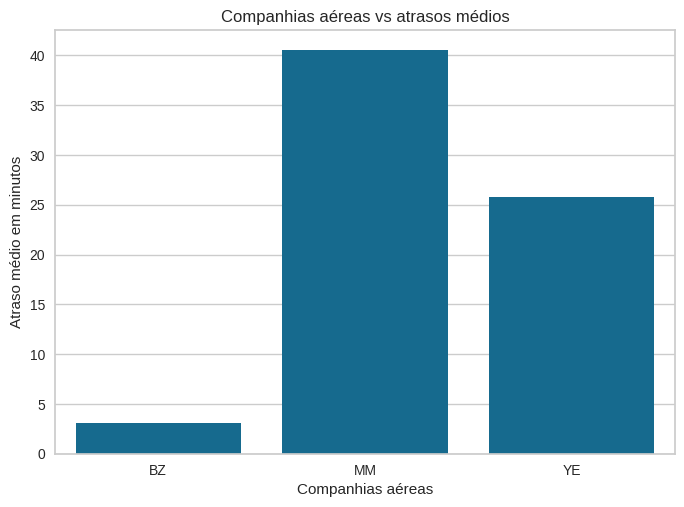

In [73]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

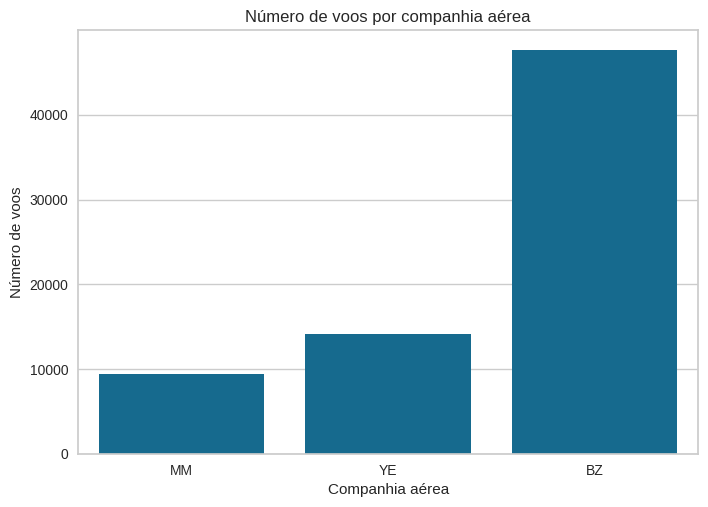

In [74]:
sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

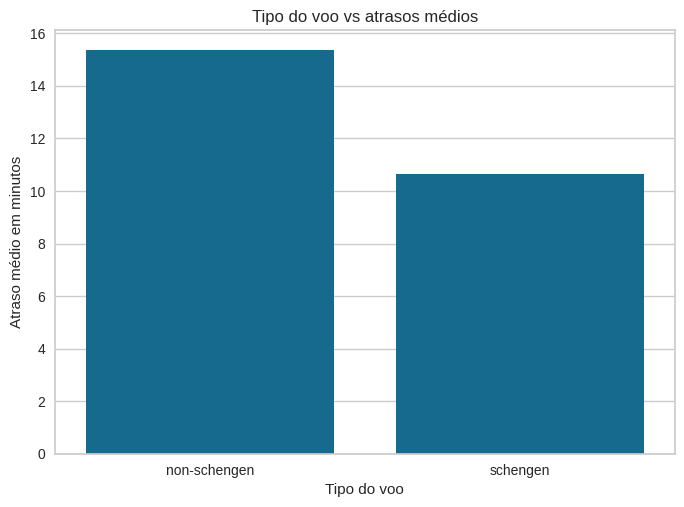

In [75]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

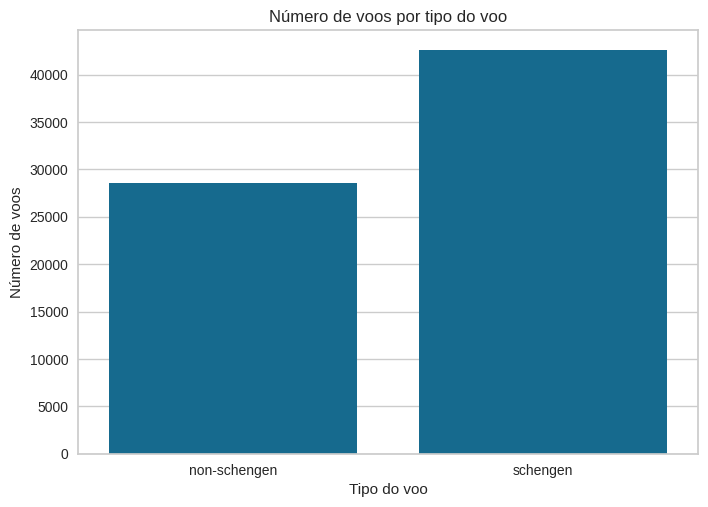

In [76]:
sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

### Para saber mais: o Espaço Schengen

O Espaço Schengen é uma área geográfica que engloba a maioria dos países europeus, onde os controles de fronteira foram eliminados para permitir a livre circulação de pessoas entre os países membros. Essa área é denominada em referência ao Acordo de Schengen, assinado em 1985 na vila de Schengen, em Luxemburgo, e implementado em 1995.

O acordo foi nomeado após o local da assinatura, mas o tratado Schengen em si foi um desenvolvimento do Acordo de Schengen de 1990.

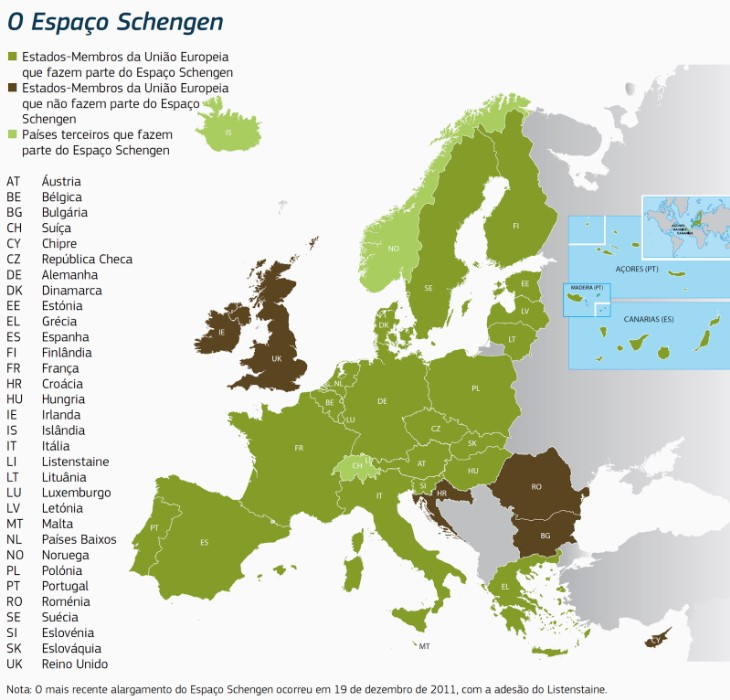

Os países que fazem parte do Espaço Schengen aboliram os controles de fronteira nas fronteiras internas, o que significa que não é necessário apresentar um passaporte ou passar por verificações de imigração ao viajar entre esses países. Já nas fronteiras externas é mais rigoroso e comum, para garantir a segurança e o controle da imigração.

Atualmente, a maioria dos países da União Europeia (UE) faz parte do Espaço Schengen, juntamente com Noruega, Islândia, Suíça e Liechtenstein que não são membros da UE. No entanto, é importante notar que nem todos os países da UE aderiram ao Acordo de Schengen.

A livre circulação dentro do Espaço Schengen facilita as viagens e o comércio entre os países membros, tornando-o uma parte fundamental da integração europeia e um exemplo de cooperação transfronteiriça em questões de segurança e imigração.


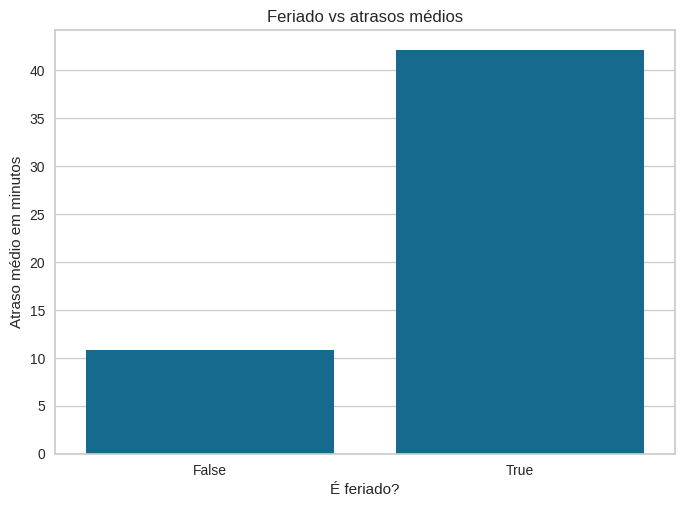

In [77]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

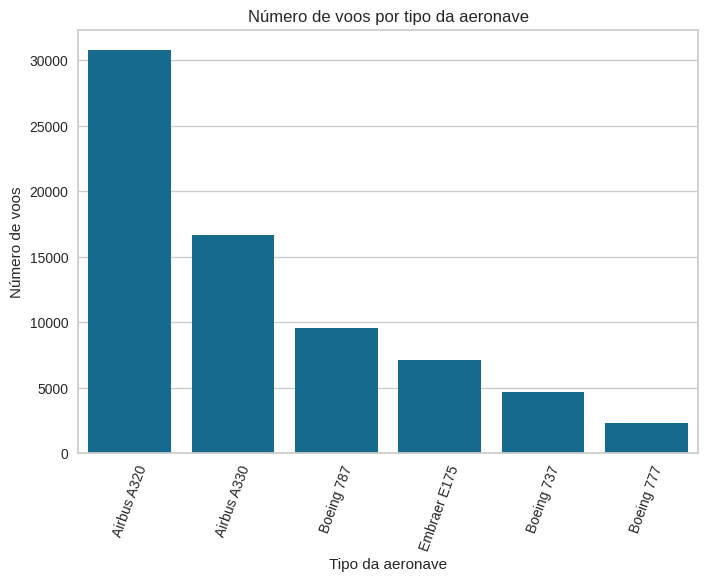

In [78]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

## 2.3 Analisando a distribuição dos dados

#### aplicando a Regra de Freedman-Diaconis

- Existe uma regra chamada Regra de Freedman-Diaconis, que fala justamente disso. Ela pode ser utilizada para selecionar a largura dos comprimentos a serem usados em um histograma, conforme indicado na [página da Wikipedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule).

In [79]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    return 2 * IQR * np.power(len(df[coluna]), -1/3)

<Axes: xlabel='arrival_time', ylabel='Count'>

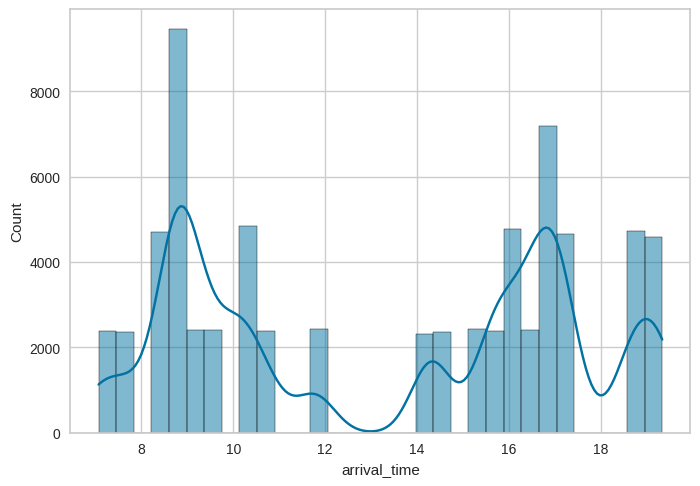

In [80]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

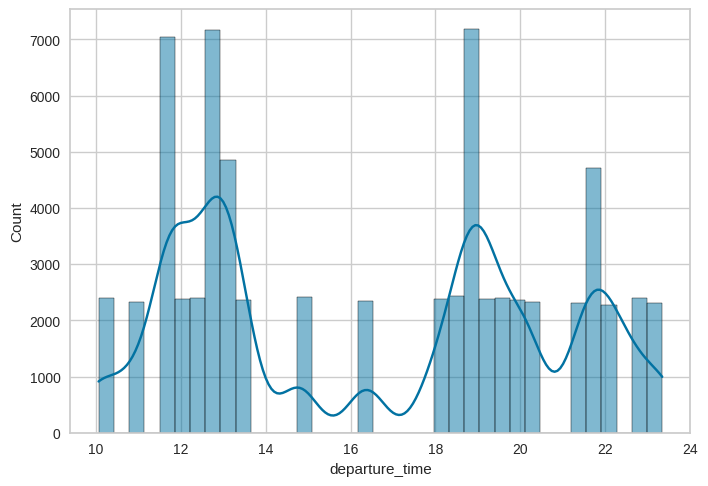

In [81]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

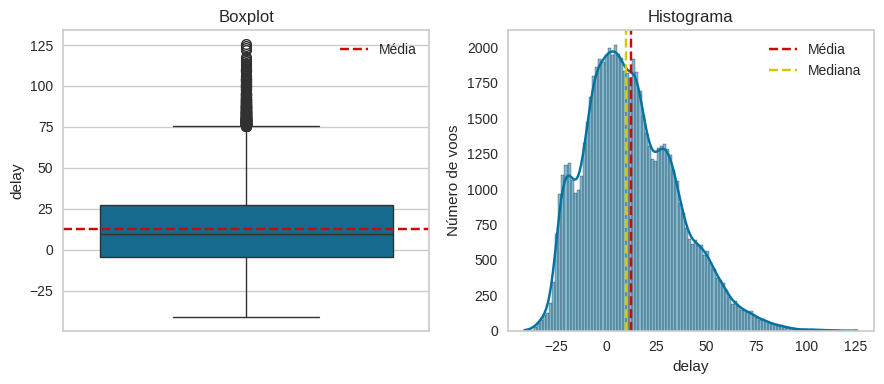

In [82]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# 3. Feature engineering

In [83]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [84]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [85]:
dados['day_name'] = dados['date'].dt.day_name
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,<bound method PandasDelegate._add_delegate_acc...
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,<bound method PandasDelegate._add_delegate_acc...
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,<bound method PandasDelegate._add_delegate_acc...
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,<bound method PandasDelegate._add_delegate_acc...
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,<bound method PandasDelegate._add_delegate_acc...


#### Para saber mais: o que é feature engineering?

- é um conceito fundamental no campo da ciência de dados e aprendizado de máquina, e desempenha um papel crucial no processo de desenvolvimento de modelos preditivos e analíticos. Essa técnica envolve a criação, transformação e seleção de variáveis, também conhecidas como "features", a partir dos dados brutos disponíveis, a fim de melhorar o desempenho dos modelos. Mas o que seriam features?

O que são features?

- Features são as variáveis ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações. Elas representam as informações que o modelo tem à sua disposição para aprender padrões nos dados. Por exemplo, se estivermos construindo um modelo para prever o preço de uma casa, as features podem incluir o número de quartos, a metragem quadrada, a localização geográfica, a proximidade de escolas, entre outras.

- A importância do Feature Engineering:

1. Melhora o desempenho do modelo: Escolher as features certas e transformá-las adequadamente pode resultar em modelos mais precisos e eficientes. Features bem projetadas podem capturar informações relevantes e eliminar ruído nos dados.

2. Reduz a dimensionalidade: Em datasets com muitas features, a dimensionalidade dos dados pode se tornar um problema. O feature engineering pode ajudar a reduzir a quantidade de features, mantendo apenas aquelas que são realmente informativas para o modelo.

Técnicas de Feature Engineering:

Existem várias técnicas de feature engineering, incluindo:

1. Criação de features: Isso envolve a criação de novas features com base nas existentes. Por exemplo, combinar as features de metragem e valor de um imóvel para criar uma feature que representa o valor por metro quadrado daquele imóvel. Ou ainda, se você tem dados de data e hora, pode criar uma nova característica que representa o dia da semana. Isso pode ser útil porque talvez haja padrões que ocorrem em dias específicos da semana.

2. Transformação de features: Pode-se aplicar funções matemáticas às features existentes para torná-las mais adequadas para o modelo. Exemplos incluem aplicar logaritmos ou escalonar valores para reduzir a escala em que a variável está.

3. Seleção de features: Nem todas as features são igualmente importantes. A seleção de features envolve identificar e manter apenas as mais relevantes para o problema em questão.

# 4. Feature Encoding

In [86]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [87]:
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [88]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['schengen']

,schengen
0,0
1,0
2,1
3,0
4,0
...,...
71170,1
71171,0
71172,1
71173,1


In [89]:
dados['is_holiday'].unique()

array([False,  True])

In [90]:
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_holiday']

,is_holiday
0,0
1,0
2,0
3,0
4,0
...,...
71170,1
71171,1
71172,1
71173,1


In [91]:
dados['is_weekend'].unique()

array([False,  True])

In [92]:
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados['is_weekend']

,is_weekend
0,0
1,0
2,0
3,0
4,0
...,...
71170,1
71171,1
71172,1
71173,1


In [93]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,<bound method PandasDelegate._add_delegate_acc...
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,<bound method PandasDelegate._add_delegate_acc...
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,<bound method PandasDelegate._add_delegate_acc...
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,<bound method PandasDelegate._add_delegate_acc...
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,<bound method PandasDelegate._add_delegate_acc...


In [94]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [95]:
pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int).head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,day_name_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7a21f940f520>>
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,0,0,1,0,0,1
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,0,0,1,0,0,1


In [96]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,day_name_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7a21f940f520>>
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,0,0,1,0,0,1
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,0,0,1,0,0,1
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,0,0,0,0,0,0,1,0,1
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,1,0,0,0,0,0,0,1
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,1


# 5. Limpando os dados

In [97]:
dados[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [98]:
df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,day_name_<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7a21f940f520>>
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# 6. Seleção e validação do modelo

#### 6.1 Treinamento do DummyRegressor

In [99]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

- Já realizei os tratamentos necessários para inserir nossos dados referentes a atrasos de voos em um modelo de machine learning. No entanto, antes de passar para a construção de modelos de machine learning mais complexos, o ideal é que tenhamos uma linha de base para comparar o desempenho desses modelos mais avançados.

- Se estiverem inferiores a essa linha de base, descartamos e não os utilizamos. Se estiverem superiores, prosseguimos com o andamento da construção do pipeline de modelos de machine learning.

#### Como construímos modelos de baseline para regressão?

- Podemos fazer uso de um método, de uma classe que o Scikit-Learn já nos fornece, que é a **DummyRegressor**. Na página da **DummyRegressor** no site do Scikit-Learn, a documentação nos diz que ele é um regressor que faz previsões usando regras simples. Mais abaixo, a documentação avisa para não a utilizar para problemas reais, pois serve apenas para fins de comparação.

OBS: O **DummyRegressor** não pode ser o nosso modelo final. Ele serve apenas para fins de comparação.

#### Implementação

- A primeira coisa que devemos fazer ao construir modelos de machine learning é separar nossos dados em variáveis explicativas e a variável alvo. A nossa variável explicativa é chamada de **X** maiúsculo, que é igual a **df_clean.drop(['delay'], axis=1)**.

- O parâmetro de **clean.drop()** é a coluna alvo, pois queremos apenas usar as colunas explicativas. Assim, estamos passando o **delay** entre colchetes. Depois, inserimos **axis=1**, pois estamos especificando o eixo das colunas. Em seguida, selecionamos a nossa variável alvo **y**, que é apenas **df_clean['delay']**. Assim temos **X** e **y** separados.

- Agora precisamos dividir nosso conjunto de dados entre treino e teste para treinar com os dados de treino e avaliar em dados não vistos, que são os dados de teste. Segue com o código abaixo

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [101]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [102]:
y_pred_dummy = model_dummy.predict(X_test)
y_pred_dummy

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [104]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

### Para saber mais: métricas utilizadas em regressão

 As métricas mais comuns para avaliar modelos de regressão, como RMSE, MAE e R2. Juntamente com essas métricas, existem diversas outras que podem ser bastante úteis durante a avaliação de um modelo de regressão. Abaixo você poderá encontrar algumas das métricas mais utilizadas e suas traduções em português:

 - Mean squared error - MSE (Erro Quadrático Médio);
 - Mean absolute error - MAE (Erro Absoluto Médio);
 - Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio);
 - Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio); e
 - Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio).

 #### Segue a documentação do [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)


#### 6.2 Treinamento do RandomForestRegressor

In [105]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.7318,
 'Erro Absoluto Médio': 11.0198,
 'R2 Score': 0.6504}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


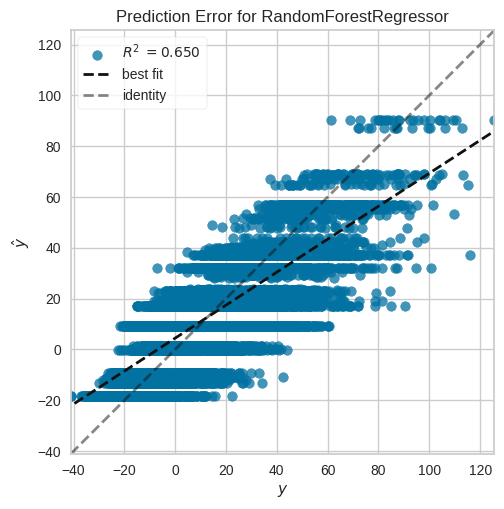

In [106]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


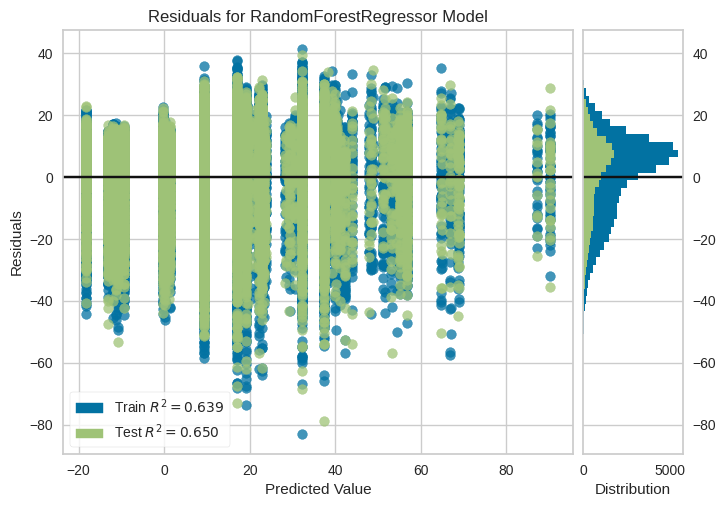

In [107]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

#### 6.3 Validação cruzada

In [108]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([2.18084717, 1.99830914, 2.00174546, 1.98807621, 1.99515939]),
 'score_time': array([0.05864573, 0.05925035, 0.05952454, 0.05944371, 0.07800531]),
 'test_mae': array([-11.08576281, -11.31945742, -11.06437166, -11.15492274,
        -11.18487274]),
 'test_rmse': array([-13.77545389, -14.06132068, -13.79817136, -13.87866356,
        -13.93192308]),
 'test_r2': array([0.64634675, 0.6236667 , 0.64510875, 0.64080803, 0.63469274])}

In [109]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')

MAE Scores: [' -11.086', ' -11.319', ' -11.064', ' -11.155', ' -11.185']
MAE Média: -11.162, Std: 0.090
----------------------------------------------------------------------------------
RMSE Scores: [' -13.775', ' -14.061', ' -13.798', ' -13.879', ' -13.932']
RMSE Média: -13.889, Std: 0.103
----------------------------------------------------------------------------------
R2 Scores: [' 0.646', ' 0.624', ' 0.645', ' 0.641', ' 0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------------------------


# 7. Otimização de hiperparâmetros

### 7.1 Seleção de recursos

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:324: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


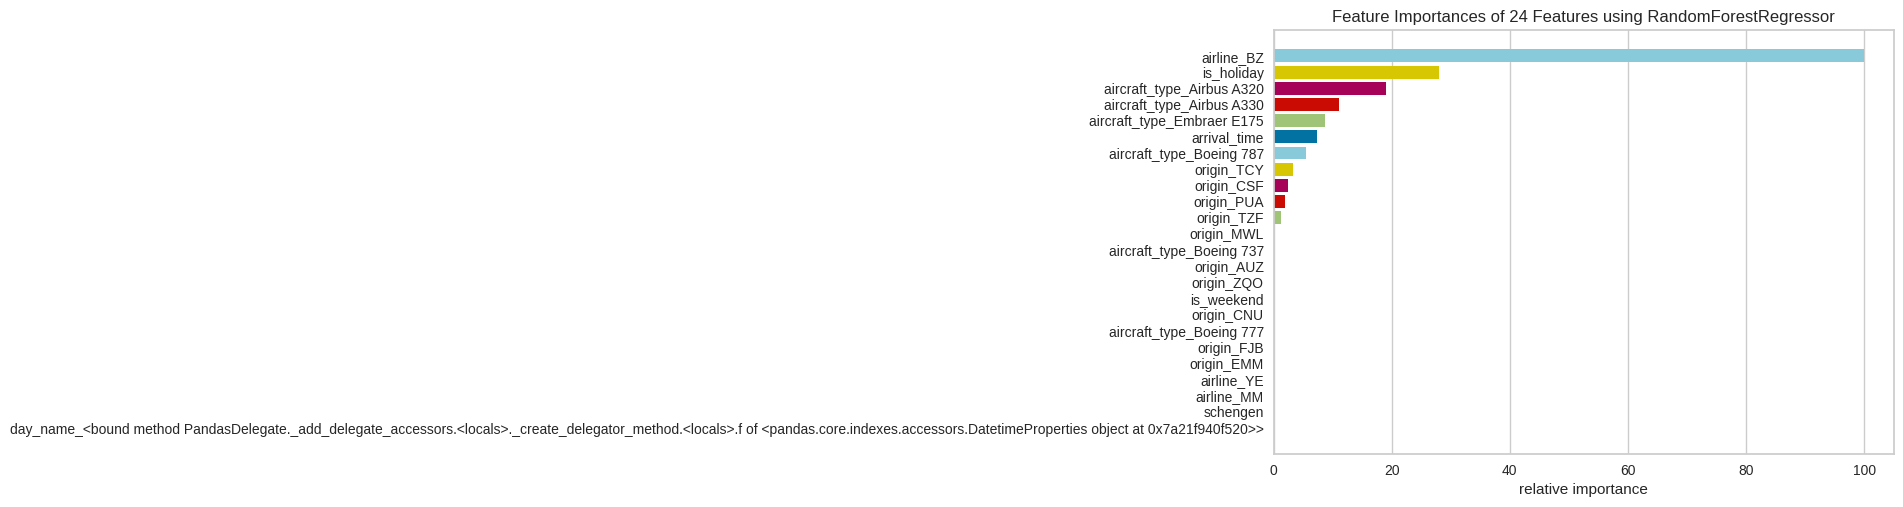

<Axes: title={'center': 'Feature Importances of 24 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [110]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(X_train, y_train) # Changed Y_train to y_train
viz.show()

In [111]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.529000
2,is_holiday,0.147944
7,aircraft_type_Airbus A320,0.100795
8,aircraft_type_Airbus A330,0.058266
12,aircraft_type_Embraer E175,0.045670
1,arrival_time,0.039178
11,aircraft_type_Boeing 787,0.029144
20,origin_TCY,0.017684
15,origin_CSF,0.012799
19,origin_PUA,0.010596


In [112]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [113]:
selected_features = feature_importances['Features'].values[:13]
X_select_features = X[selected_features]

In [114]:
X_select_features

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175
0,0,8.885071,0,0,0,1,0,1,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,0,0,1
3,0,15.967963,0,0,1,0,0,0,1,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,1,1,0,0,0,0,0,0,0,1
71171,0,16.718722,1,1,1,0,0,0,1,0,0,0,0
71172,1,8.564949,1,1,0,1,0,0,0,0,0,1,0
71173,1,9.344097,1,1,1,0,0,1,0,0,0,0,0


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42) # Use X_select_features instead of X_selected_features

#### 7.2 Otimizando os hiperparãmetros com o GridSearchCV

In [116]:
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 4, 6],
'n_estimators': [100, 150, 200]
}

In [117]:
from sklearn.model_selection import GridSearchCV

In [64]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [118]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:
metricas = calcular_metricas_regressao(y_test, y_pred)

In [120]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [121]:
results_df[count] = list(metricas.values())

In [122]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


# 8. Salvando o modelo

In [123]:
import pickle

In [124]:
try:
    with open('model_producao.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!
